# Preprocessing Reddit Data

## Preprocessing

In [1]:
import pandas as pd
import re
import os
import nltk
from nltk.corpus import stopwords

In [31]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Create a list of stopwords (you can add more custom ones here)
custom_stopwords = set(nltk.corpus.stopwords.words('english') + [
    'dont', 'im', 'u', 'isnt', 'i', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ours', 
    'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'this', 'that', 'these', 'those', 'is', 'am', 'are', 'was', 'were', 'be', 'been', 'being', 'and', 
    'or', 'but', 'so', 'because', 'although', 'bla', 'j', 'da', 'if', 'when', 'while', "video", 
    "subscribe", "channel", "comment", "link", "HTTP", "mar", "example", "said", "say", "ive", "also", 
    "skin", "one", "get", "tried", "use", "like", "really", "would", "using", "used", "welcome", "products", "please"
])

# Light preprocessing function with stopword removal and punctuation removal
def light_preprocess(text):
    if pd.isna(text):
        return ""
    
    # Remove newlines, tabs, and extra spaces
    text = re.sub(r"[\n\t\r]+", " ", text)
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # Remove mentions
    text = re.sub(r"@\w+", "", text)
    
    # Remove all punctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Normalize spacing
    text = re.sub(r"\s+", " ", text).strip()
    
    # Tokenize and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    
    # Rejoin filtered words into a string
    return " ".join(filtered_words)

# List of files to process
file_list = [
    "reddit_avene.csv",
    "reddit_bioderma.csv",
    "reddit_cerave.csv",
    "reddit_roche.csv",
    "reddit_uriage.csv"
]

# Process each file
for file_name in file_list:
    try:
        # Load the CSV
        df = pd.read_csv(file_name)

        # Combine title and selftext for posts
        df["post_text"] = df["title"].fillna("") + " " + df["selftext"].fillna("")

        # Use 'body' for comments
        df["comment_text"] = df["body"].fillna("")

        # Apply light preprocessing
        df["clean_post_text"] = df["post_text"].apply(light_preprocess)
        df["clean_comment_text"] = df["comment_text"].apply(light_preprocess)

        # Save the preprocessed file
        output_file = f"processed_{file_name}"
        df.to_csv(output_file, index=False)
        print(f"Processed and saved: {output_file}")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /opt/anaconda3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed and saved: processed_reddit_avene.csv
Processed and saved: processed_reddit_bioderma.csv
Processed and saved: processed_reddit_cerave.csv
Processed and saved: processed_reddit_roche.csv
Processed and saved: processed_reddit_uriage.csv


## EDA

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
# Set the folder path to the current directory (same directory as your Python script)
folder_path = "./"  # Current directory where the Python script and CSV files are located

# Get only CSV files that start with 'processed_'
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f.startswith('processed_')]

df_list = []

for file in file_names:
    file_path = os.path.join(folder_path, file)
    
    # Load each file into a dataframe
    df = pd.read_csv(file_path)
    
    # Extract brand name from the file name (e.g., 'processed_reddit_avene.csv' -> 'avene')
    brand_name = file.split('_')[2].split('.')[0]
    df['brand'] = brand_name
    
    # Add the dataframe to the list
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

# The dataframe with data for each brand
print(df.head())


  id_comment        author_comment  \
0    eamn8d7  coffee_for_president   
1    eam76i6               deleted   
2    ecm9bcu           cookiepukie   
3    eanx8yq         faramaobscena   
4    eamtvgs               deleted   

                                                body  score_comment  \
0  **Bariésun Kid Milk SPF 50** is my HG sunscree...             15   
1                                          [deleted]              9   
2  When I was at City Pharma, I noticed a tube of...              8   
3  Uriage Bariesun Creme XP SPF50: meant to get t...              7   
4  Just a thought... There might not be as many r...              3   

  created_date_comment post_id author_post                      title  \
0  2018-11-28 09:37:26  a11xju      amk933  [Misc] What about Uriage?   
1  2018-11-28 04:02:47  a11xju      amk933  [Misc] What about Uriage?   
2  2018-12-27 00:06:33  a11xju      amk933  [Misc] What about Uriage?   
3  2018-11-28 21:15:42  a11xju      amk933  [Misc] W

Top Words for uriage


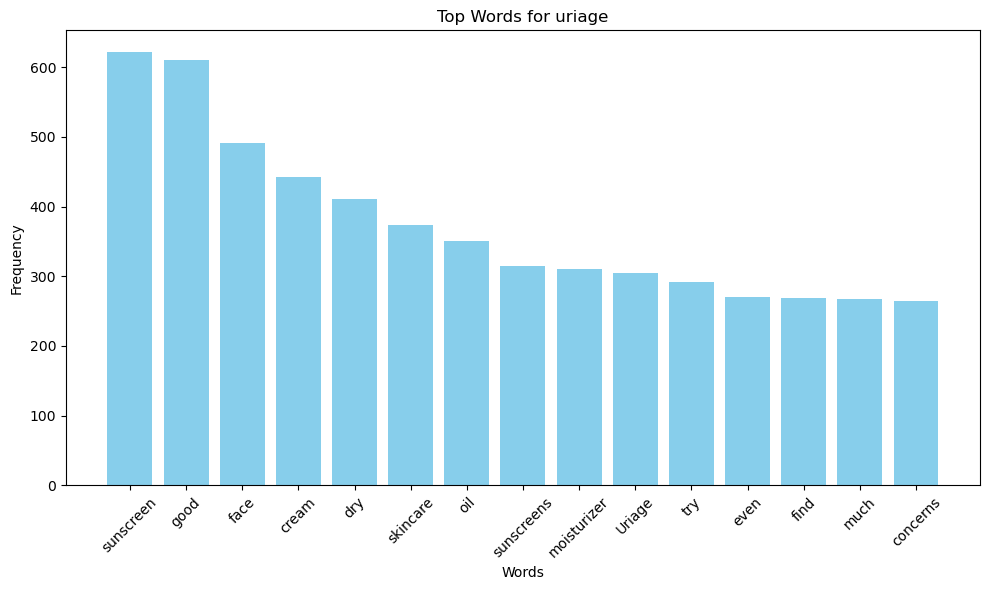

Top Words for roche


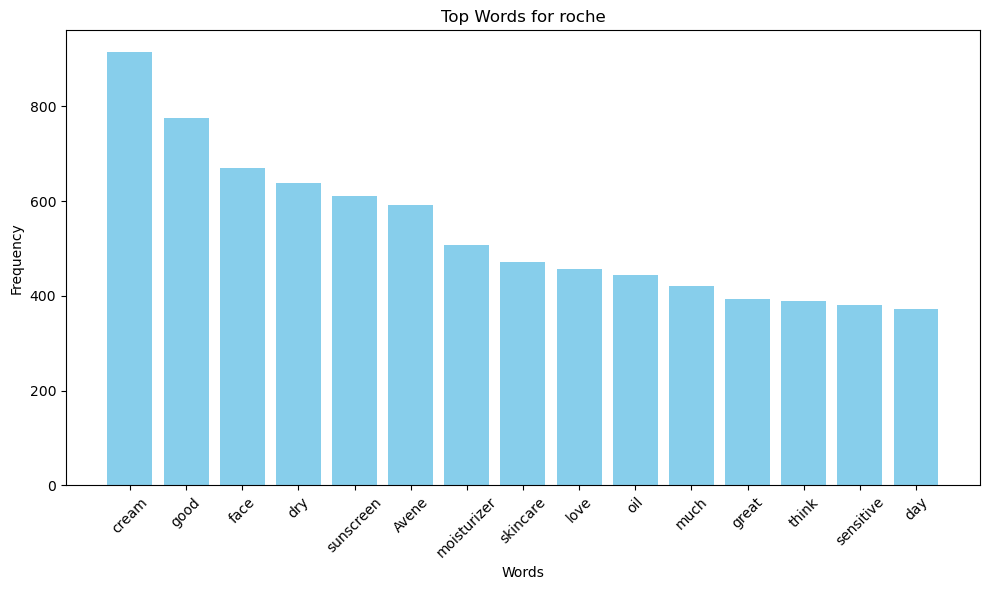

Top Words for cerave


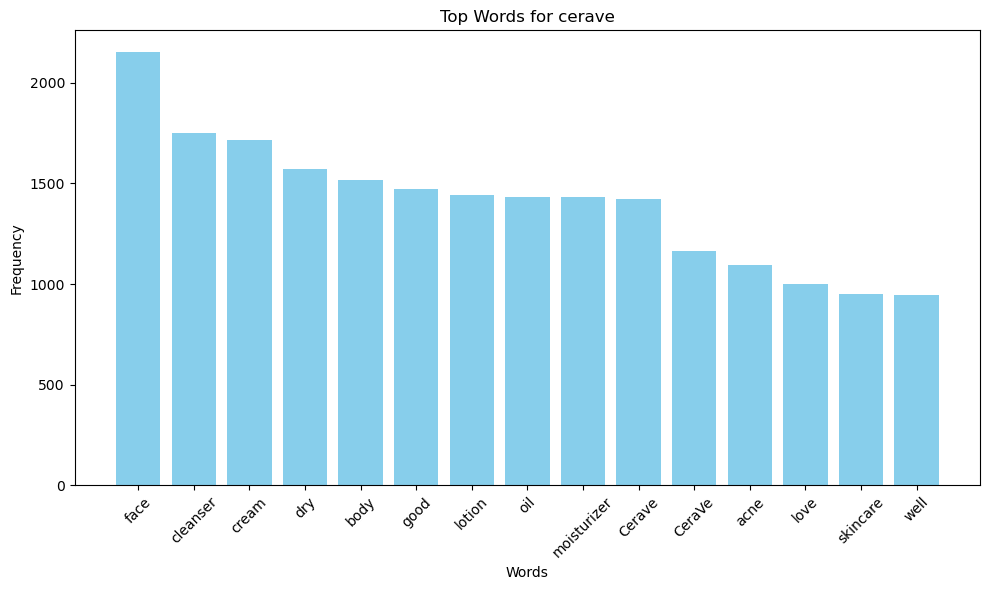

Top Words for avene


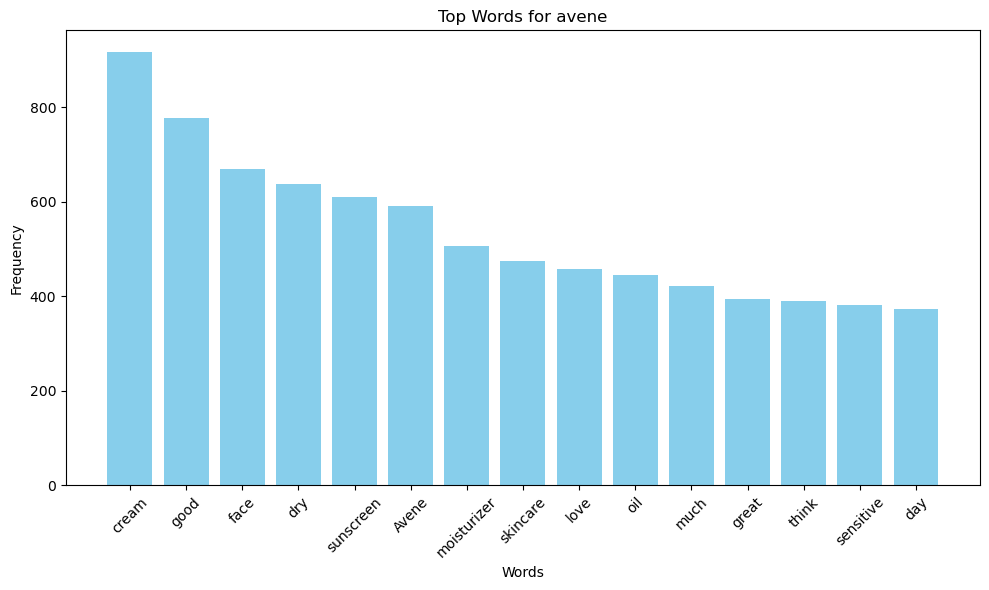

Top Words for bioderma


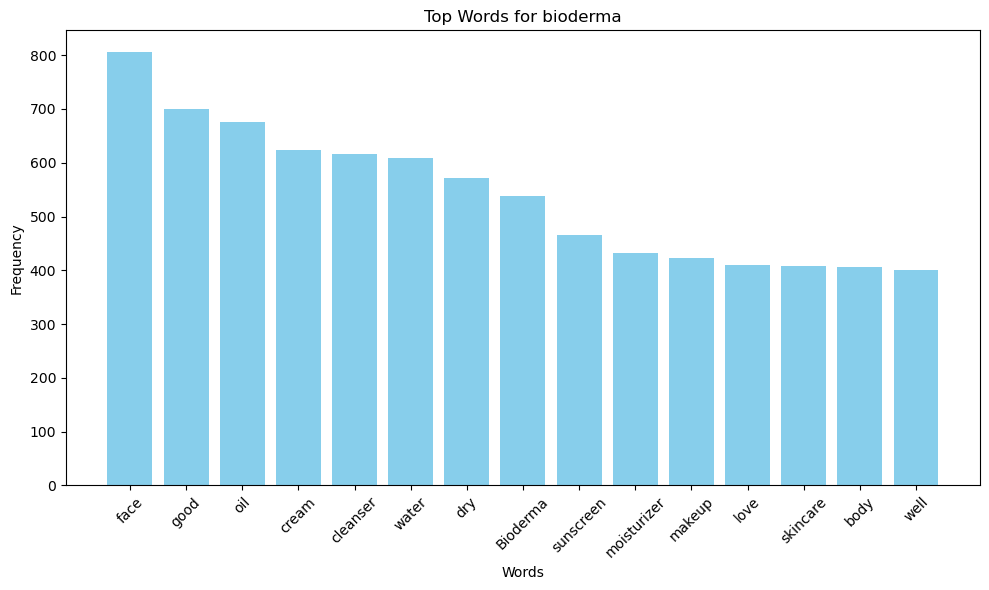

In [35]:
import matplotlib.pyplot as plt
from collections import Counter

def freq_distribution(df, column, top_n=15, plot_title="Word Frequency"):
    # Tokenize all text
    words = " ".join(df[column].dropna()).split()
    
    # Count word frequencies
    counter = Counter(words)
    most_common = counter.most_common(top_n)
    
    # Separate words and frequencies
    words, freqs = zip(*most_common)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(words, freqs, color='skyblue')
    plt.title(plot_title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Brand-specific word frequency distribution (Bar plot)
def plot_top_words_by_brand(df, column, top_n=15):
    brands = df['brand'].unique()

    for brand in brands:
        brand_data = df[df['brand'] == brand]
        print(f"Top Words for {brand}")
        freq_distribution(brand_data, column, top_n=top_n, plot_title=f"Top Words for {brand}")

# Example usage: Analyze the 'clean_comment_text' column
plot_top_words_by_brand(df, 'clean_comment_text', top_n=15)


/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/ipykernel_20356/1312384151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].dt.to_period('M').astype(str)


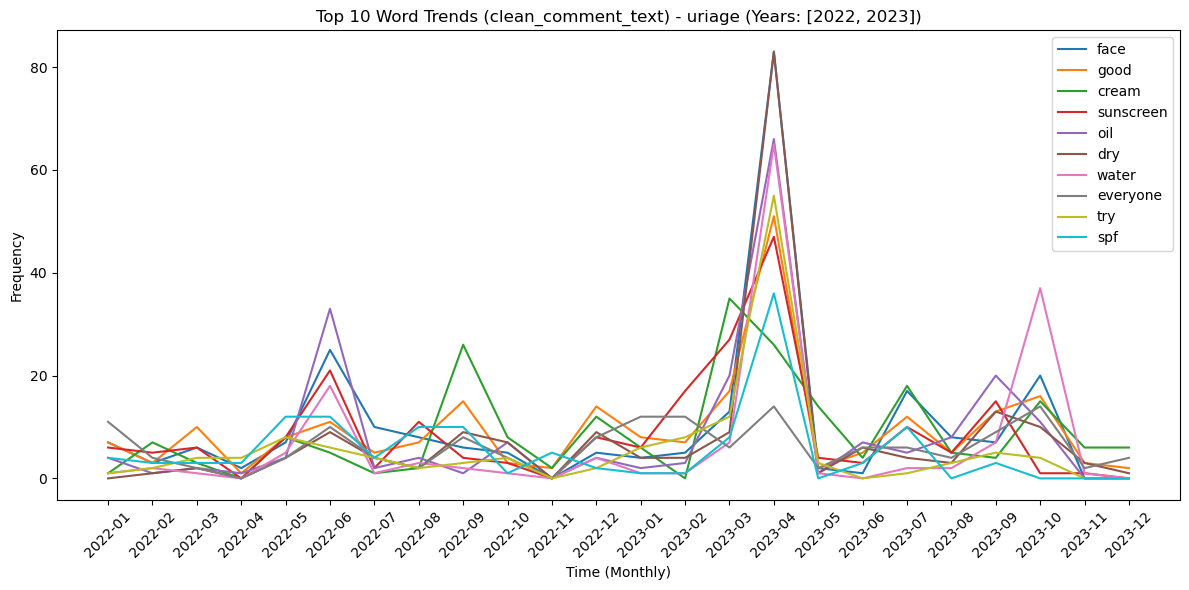

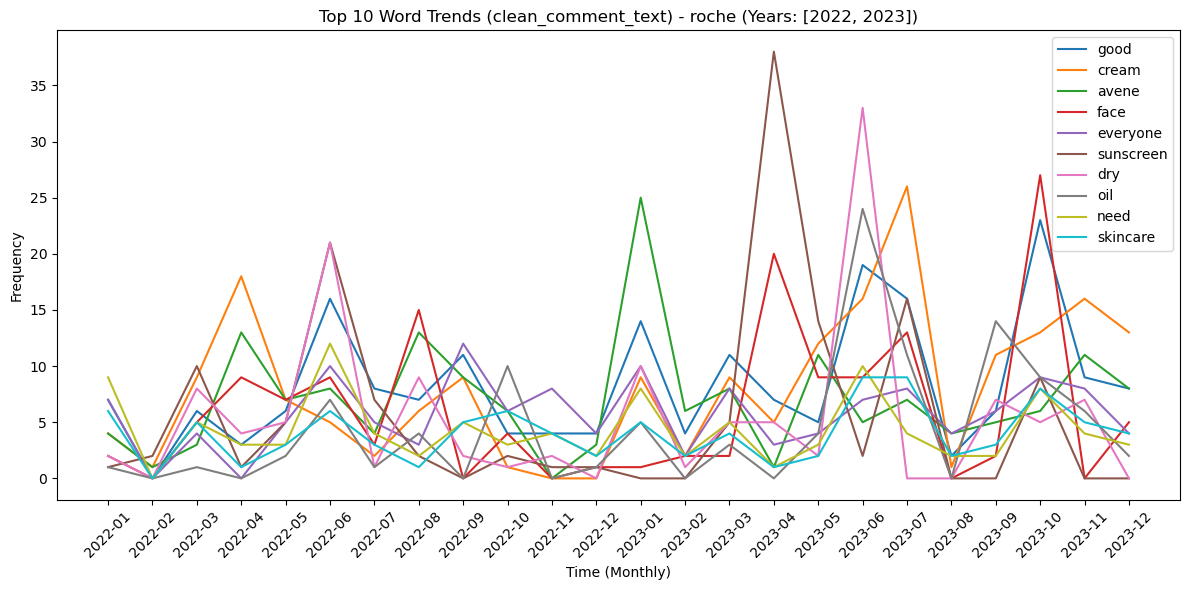

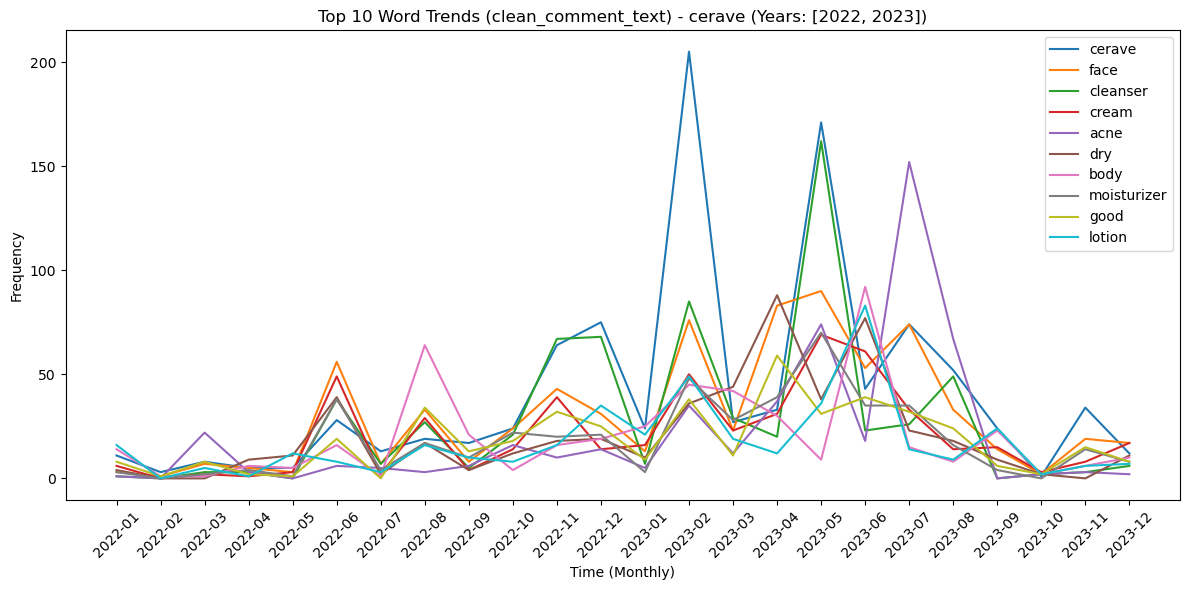

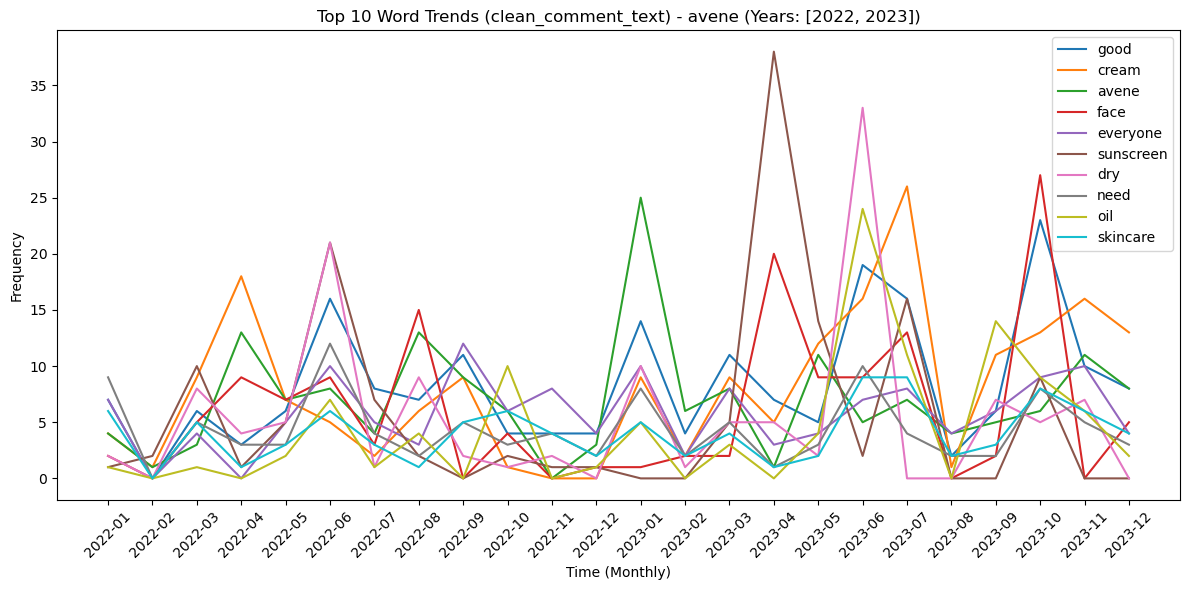

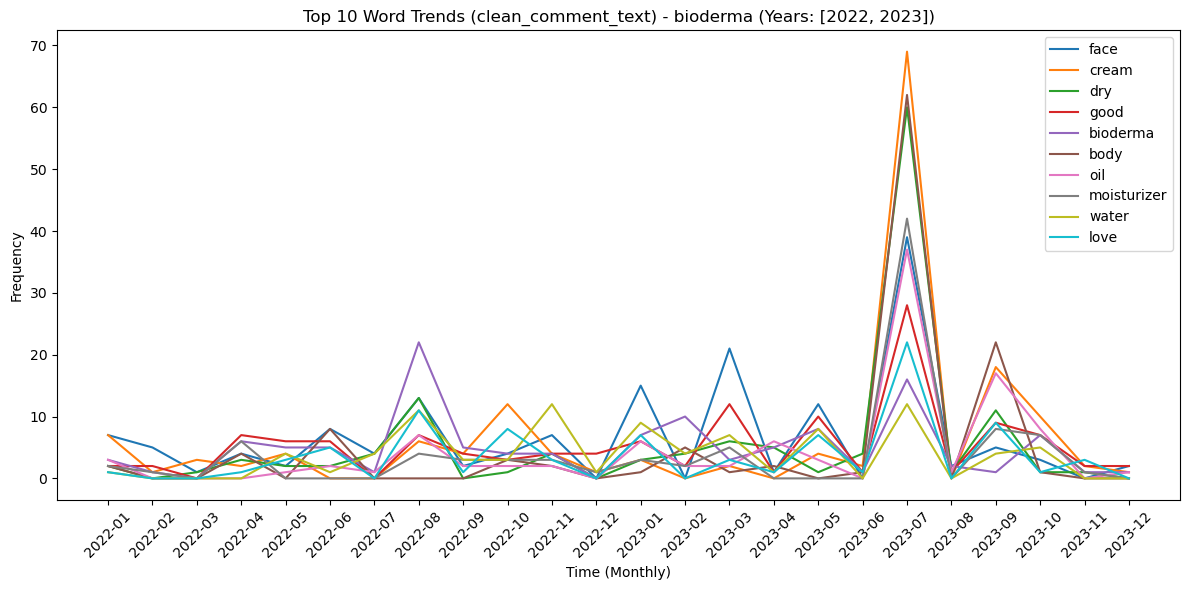

/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/ipykernel_20356/1312384151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].dt.to_period('M').astype(str)


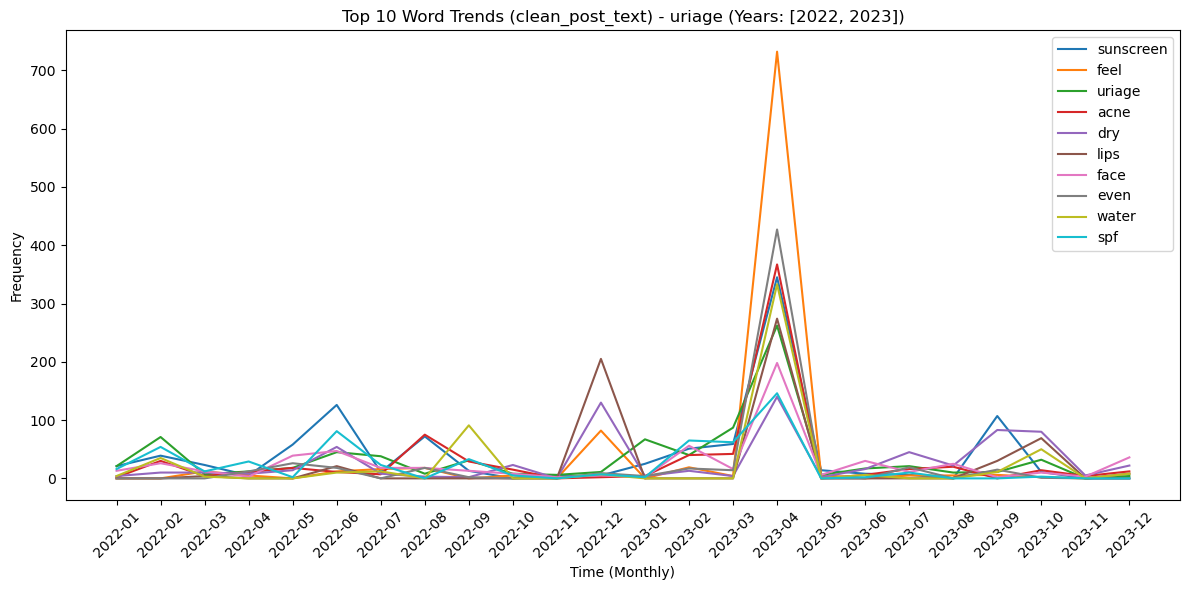

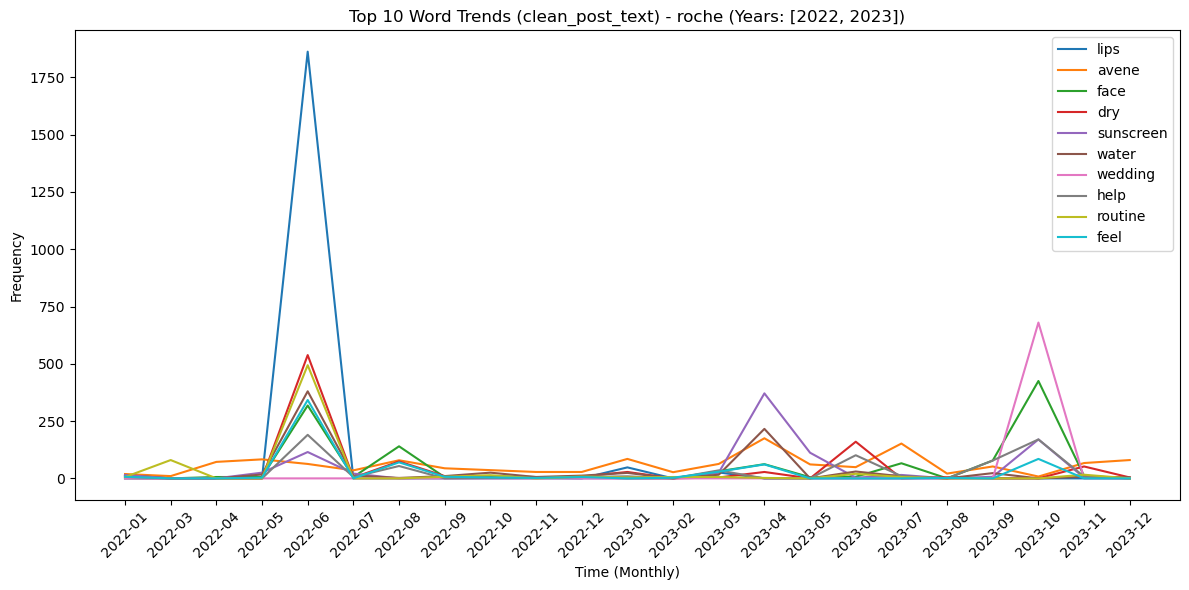

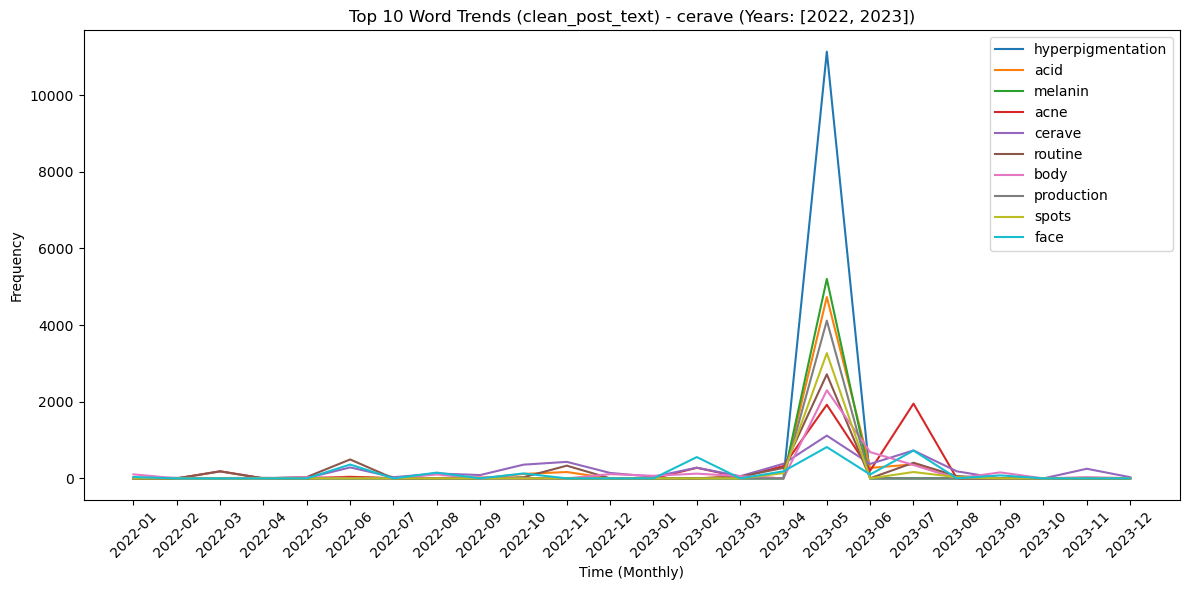

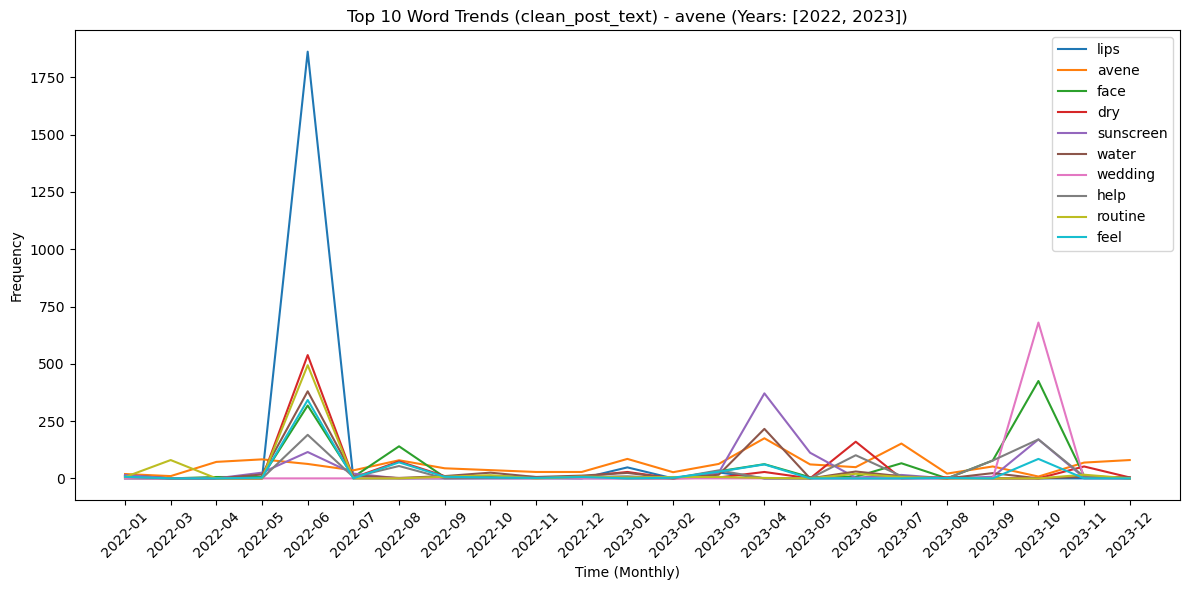

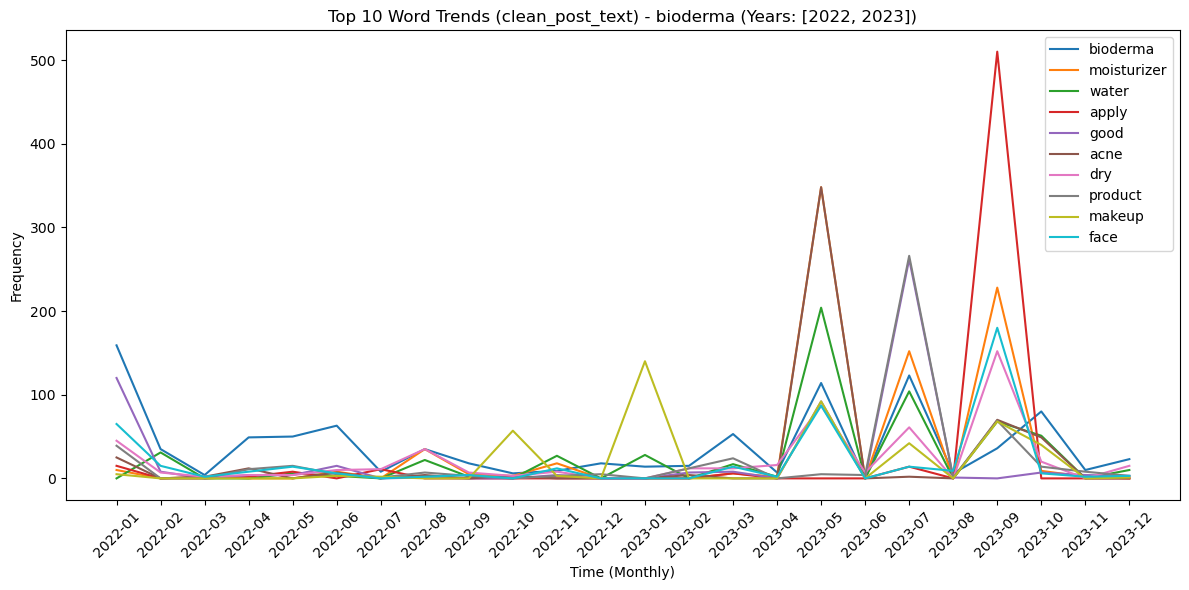

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to plot top word trends over time by brand and time column, with year filter
def plot_word_trends_over_time(df, text_column, time_column, brand_column='brand', top_n=10, years=[2022, 2023]):
    # Convert to datetime and extract only the desired years
    df['time'] = pd.to_datetime(df[time_column], errors='coerce')
    df = df[df['time'].dt.year.isin(years)]  # Filter to specific years
    df['time'] = df['time'].dt.to_period('M').astype(str)

    df = df.dropna(subset=['time'])

    brands = df[brand_column].unique()

    for brand in brands:
        brand_data = df[df[brand_column] == brand]

        # Count word frequencies per time period
        time_word_freq = {}
        for time in sorted(brand_data['time'].unique()):
            texts = brand_data[brand_data['time'] == time][text_column].dropna().astype(str)
            all_words = " ".join(texts).lower().split()
            word_counts = Counter(all_words)
            time_word_freq[time] = word_counts

        # Get top N words across all periods
        all_words_total = Counter()
        for wc in time_word_freq.values():
            all_words_total.update(wc)
        top_words = [word for word, _ in all_words_total.most_common(top_n)]

        # Prepare data for plotting
        trend_data = {word: [] for word in top_words}
        time_points = sorted(time_word_freq.keys())
        for time in time_points:
            for word in top_words:
                trend_data[word].append(time_word_freq[time].get(word, 0))

        trend_df = pd.DataFrame(trend_data, index=time_points)

        # Plot
        plt.figure(figsize=(12, 6))
        for word in top_words:
            plt.plot(trend_df.index, trend_df[word], label=word)
        plt.title(f"Top {top_n} Word Trends ({text_column}) - {brand} (Years: {years})")
        plt.xlabel("Time (Monthly)")
        plt.ylabel("Frequency")
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Use the function for both comments and posts (filtered to 2022 and 2023)
plot_word_trends_over_time(df, text_column='clean_comment_text', time_column='created_date_comment', top_n=10, years=[2022, 2023])
plot_word_trends_over_time(df, text_column='clean_post_text', time_column='created_date_post', top_n=10, years=[2022, 2023])



In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word cloud for each brand
def plot_word_cloud_by_brand(df, text_column='clean_comment_text', brand_column='brand', font_path=None):
    """
    Generates and displays word clouds for each brand based on the specified text column.
    
    Parameters:
    - df: DataFrame containing the data
    - text_column: the name of the column containing text data
    - brand_column: the name of the column specifying brands
    - font_path: path to font (optional, useful for Korean or other languages)
    """
    brands = df[brand_column].unique()

    for brand in brands:
        brand_data = df[df[brand_column] == brand]

        # Combine all text into one string
        text = ' '.join(brand_data[text_column].dropna().astype(str))

        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            font_path=font_path,  # Optional, for Korean etc.
            max_words=200,
            collocations=False  # Treat individual words, not phrases
        ).generate(text)

        # Plot
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for {brand}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()


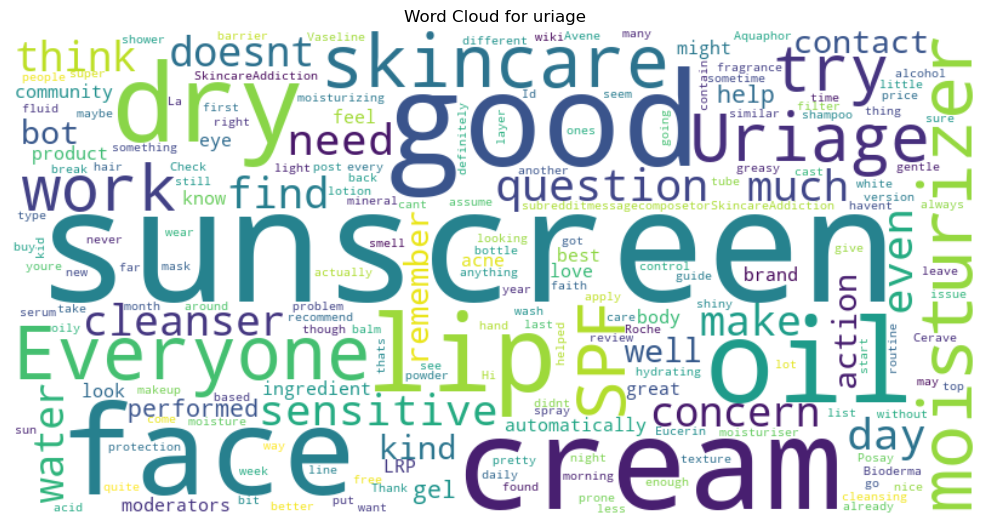

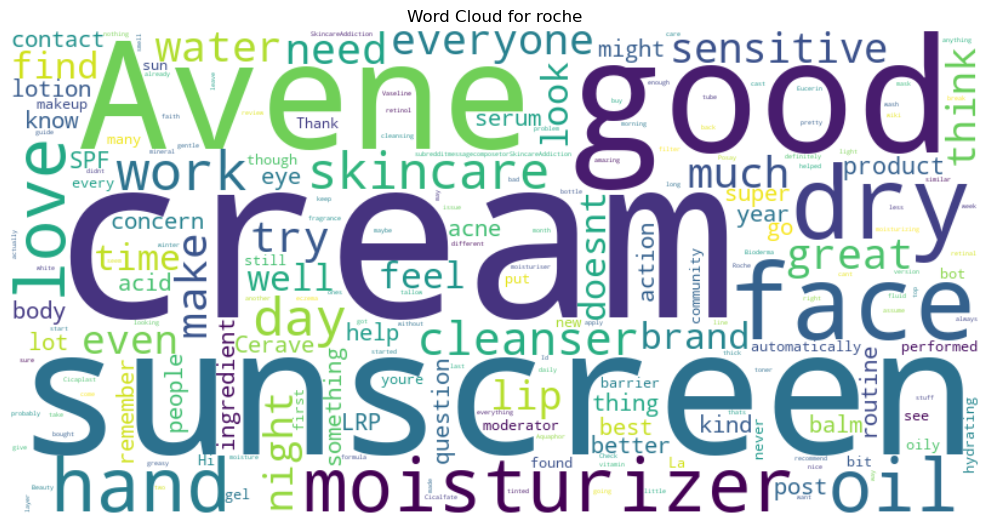

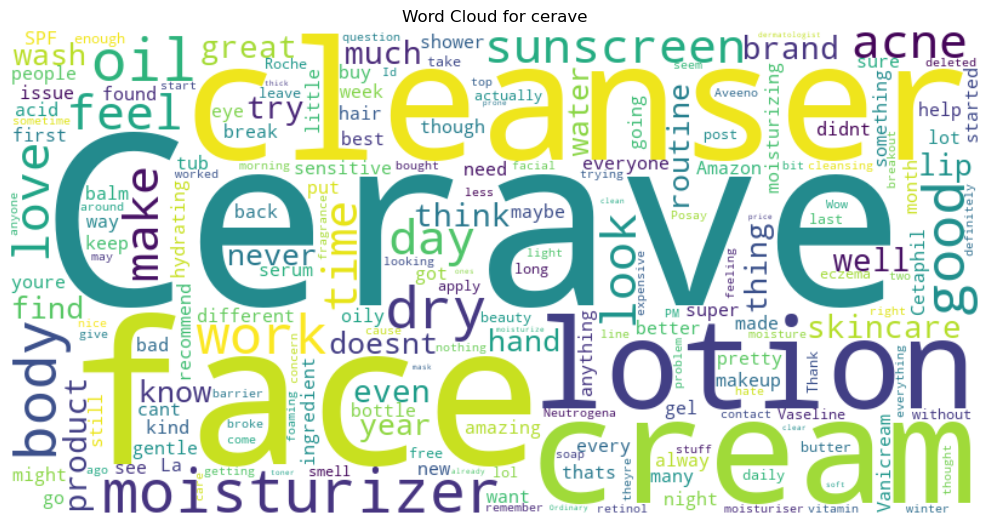

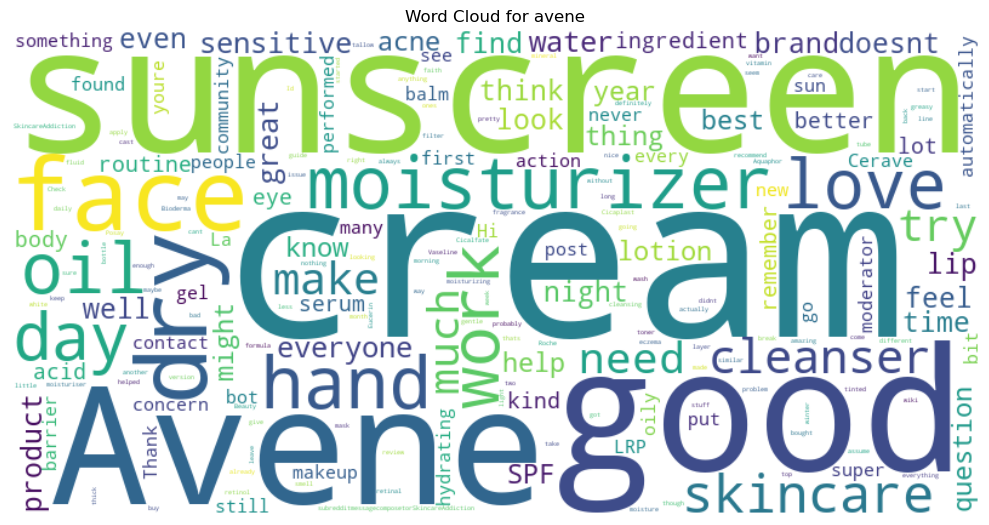

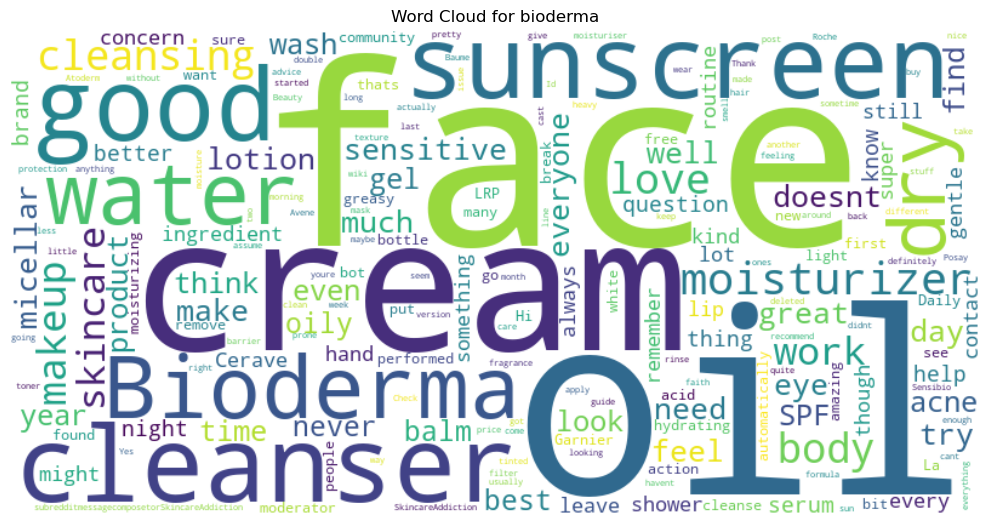

In [41]:
# For English text
plot_word_cloud_by_brand(df, text_column='clean_comment_text')

# For Korean text (optional)
# plot_word_cloud_by_brand(df, text_column='clean_comment_text', font_path='/Library/Fonts/AppleGothic.ttf')

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_bigrams_by_brand(df, comment_col='processed_comment', post_col='processed_post', brand_col='brand', top_n=15):
    """
    Plots top bigrams per brand using both comment and post text.

    Parameters:
    - df: DataFrame with processed text and brand info
    - comment_col: name of the column with processed comment text
    - post_col: name of the column with processed post text
    - brand_col: name of the brand column
    - top_n: number of top bigrams to display per brand
    """
    brands = df[brand_col].unique()

    for brand in brands:
        brand_df = df[df[brand_col] == brand]

        # Combine processed comments and posts into one list
        combined_text = brand_df[comment_col].fillna('') + ' ' + brand_df[post_col].fillna('')
        text_list = combined_text.tolist()

        # Vectorize using bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=None)
        X = vectorizer.fit_transform(text_list)
        bigrams = vectorizer.get_feature_names_out()
        counts = X.sum(axis=0).A1
        bigram_freq = dict(zip(bigrams, counts))

        # Get top bigrams
        top_bigrams = Counter(bigram_freq).most_common(top_n)
        bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

        # Plot
        plt.figure(figsize=(10, 5))
        sns.barplot(data=bigram_df, y='Bigram', x='Frequency', palette='coolwarm')
        plt.title(f"Top {top_n} Bigrams for {brand}")
        plt.xlabel("Frequency")
        plt.ylabel("Bigram")
        plt.tight_layout()
        plt.show()


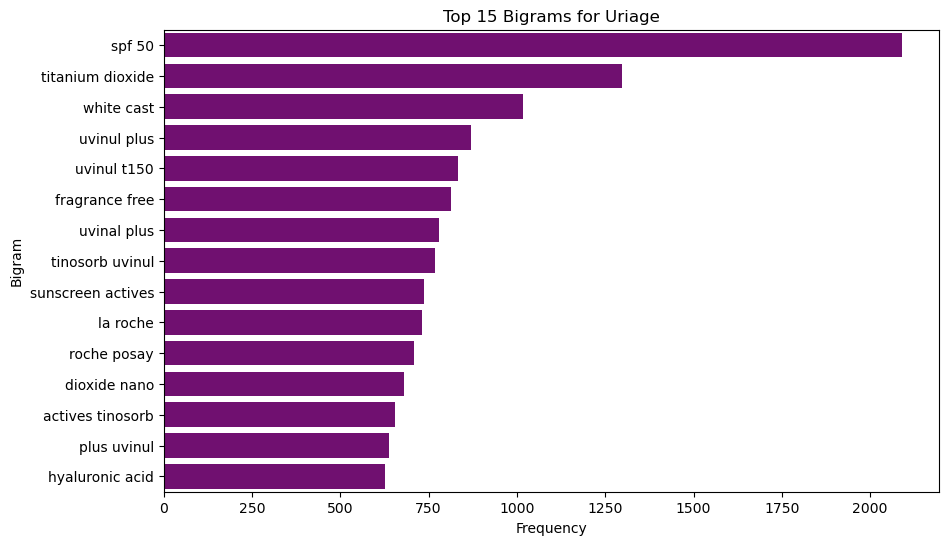

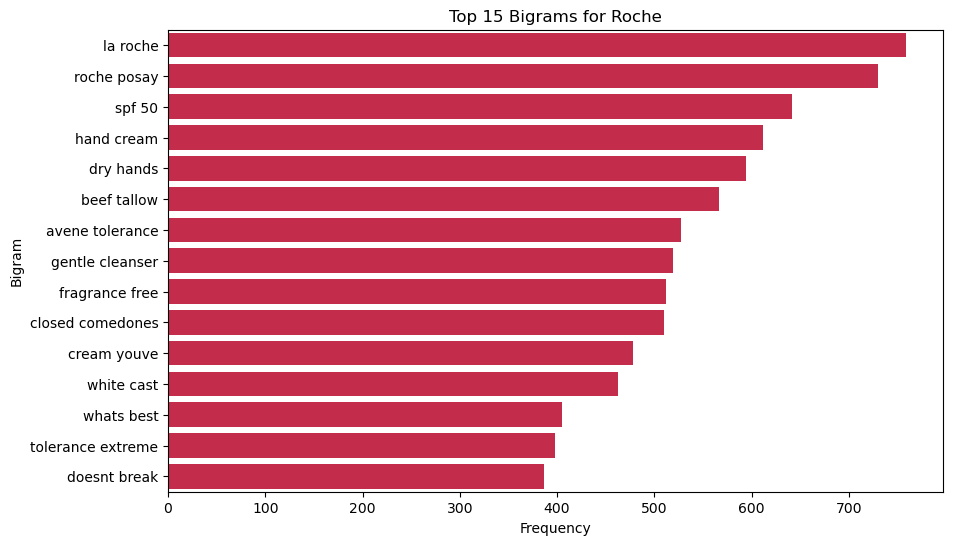

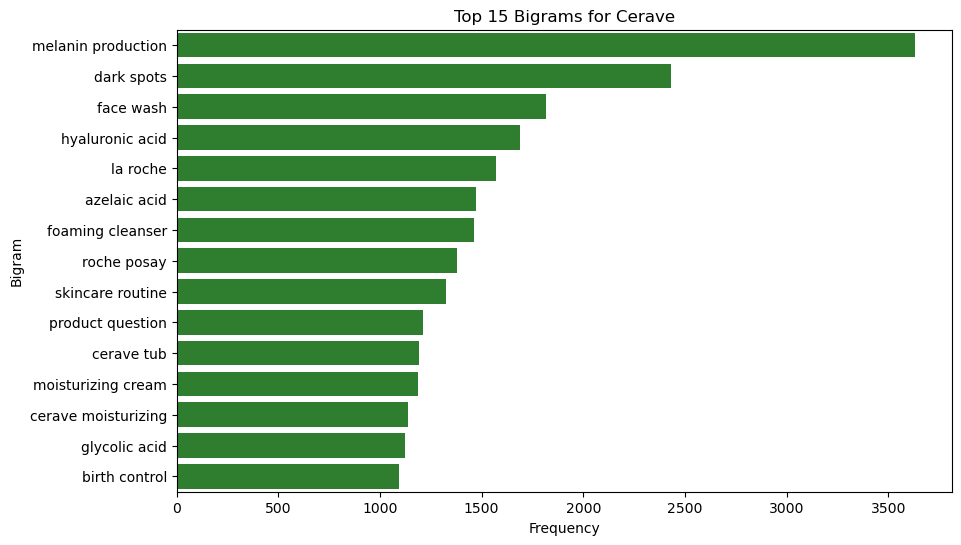

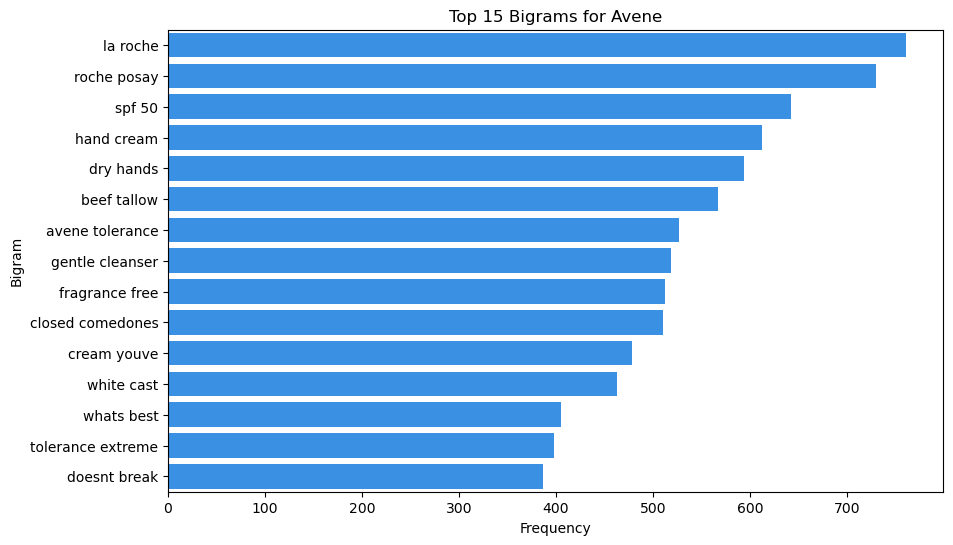

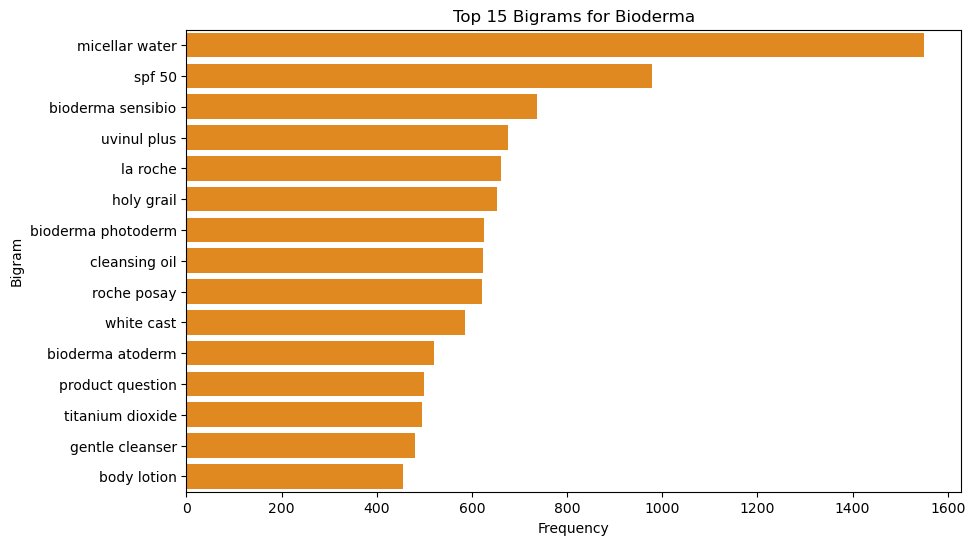

In [53]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

def plot_top_bigrams_by_brand(df, comment_col, post_col, brand_col, top_n=15):
    # Define colors for each brand
    brand_colors = {
        'avene': 'dodgerblue',  # Change these color values as needed
        'bioderma': 'darkorange',
        'cerave': 'forestgreen',
        'roche': 'crimson',
        'uriage': 'purple'
    }
    
    brands = df[brand_col].unique()  # Get unique brands
    
    for brand in brands:
        brand_df = df[df[brand_col] == brand]  # Filter data for the current brand
        
        # Combine processed comments and posts into one list
        combined_text = brand_df[comment_col].fillna('') + ' ' + brand_df[post_col].fillna('')
        text_list = combined_text.tolist()
        
        # Vectorize the text using bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
        X = vectorizer.fit_transform(text_list)
        
        # Get the frequency of bigrams
        bigram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])))
        
        # Get top N bigrams
        top_bigrams = bigram_freq.most_common(top_n)
        bigrams, counts = zip(*top_bigrams)
        
        # Plot the top N bigrams for the brand
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(counts), y=list(bigrams), color=brand_colors.get(brand, 'gray'))  # Default gray if no color is specified
        plt.title(f"Top {top_n} Bigrams for {brand.capitalize()}")
        plt.xlabel('Frequency')
        plt.ylabel('Bigram')
        plt.show()

# Example usage:
plot_top_bigrams_by_brand(df, comment_col='clean_comment_text', post_col='clean_post_text', brand_col='brand', top_n=15)



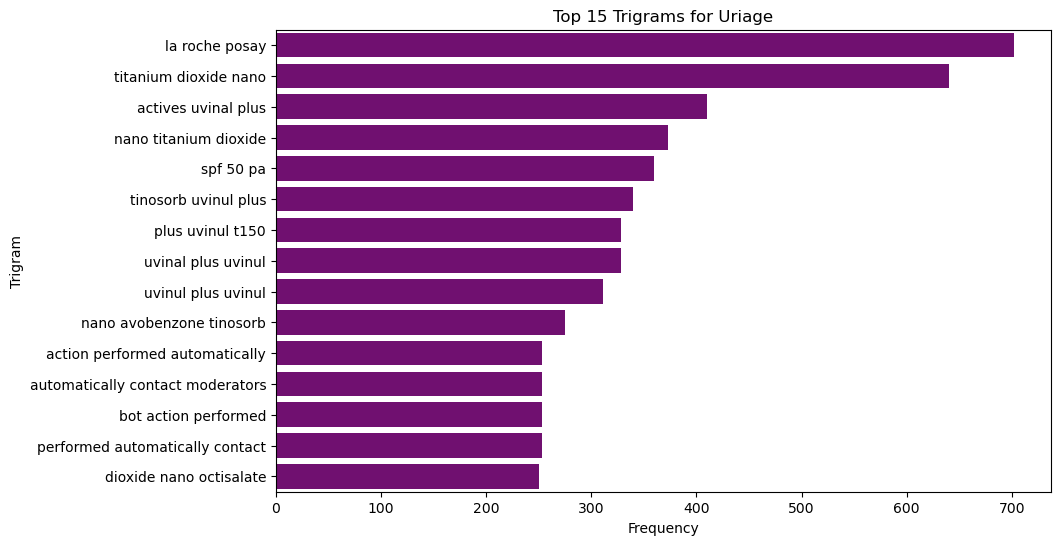

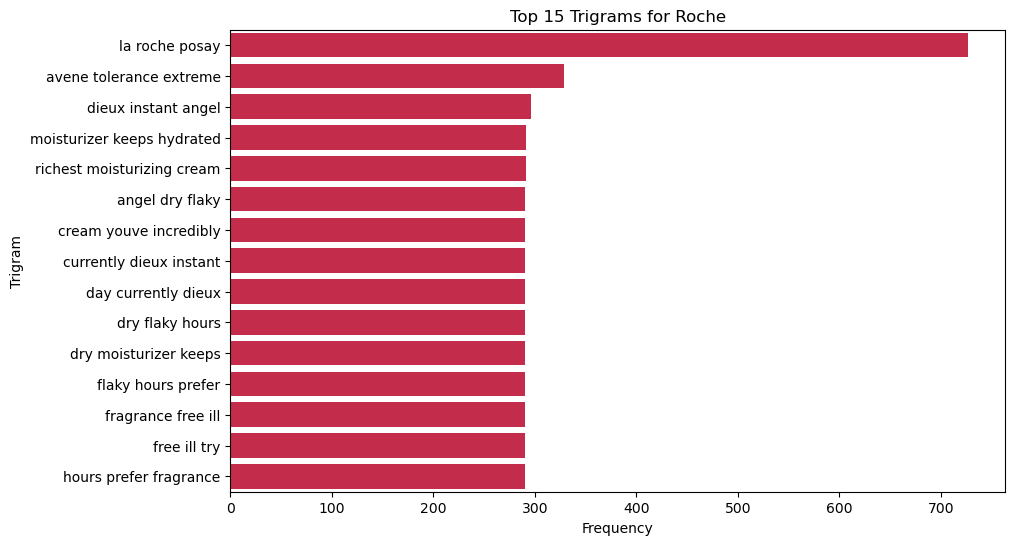

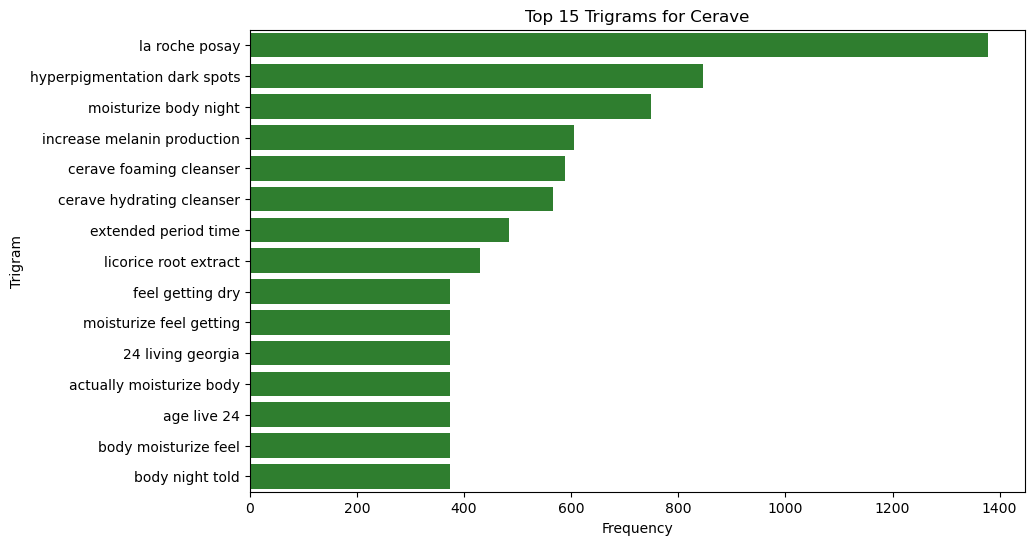

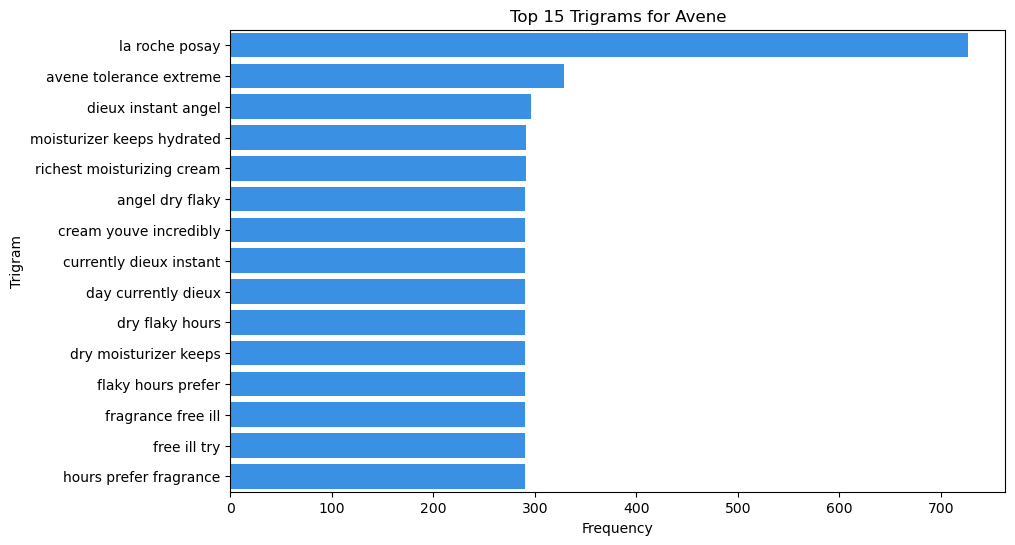

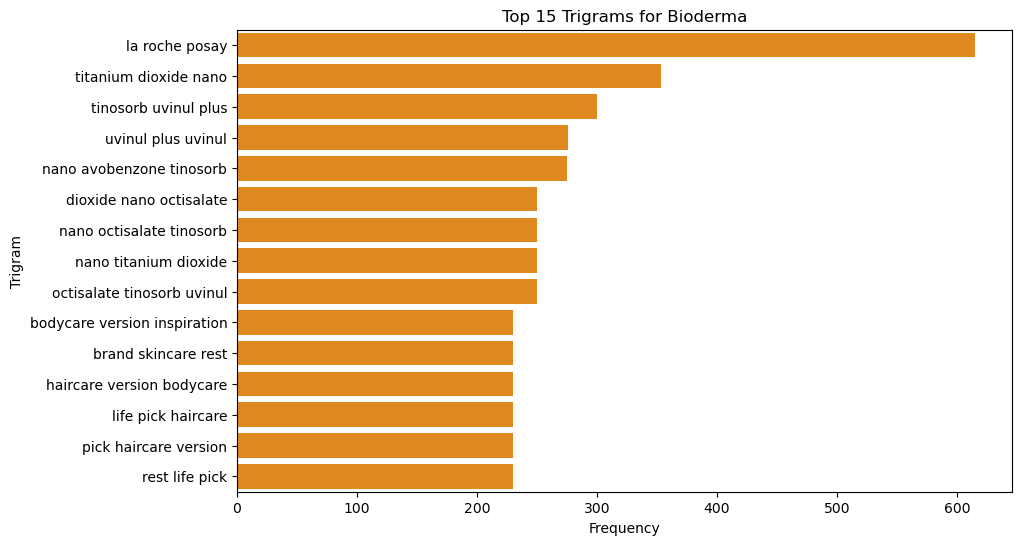

In [58]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns

def plot_top_trigrams_by_brand(df, comment_col, post_col, brand_col, top_n=15):
    # Define colors for each brand
    brand_colors = {
        'avene': 'dodgerblue',  # Change these color values as needed
        'bioderma': 'darkorange',
        'cerave': 'forestgreen',
        'roche': 'crimson',
        'uriage': 'purple'
    }
    
    brands = df[brand_col].unique()  # Get unique brands
    
    for brand in brands:
        brand_df = df[df[brand_col] == brand]  # Filter data for the current brand
        
        # Combine processed comments and posts into one list
        combined_text = brand_df[comment_col].fillna('') + ' ' + brand_df[post_col].fillna('')
        text_list = combined_text.tolist()
        
        # Vectorize the text using trigrams (ngram_range=(3, 3) for trigrams)
        vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
        X = vectorizer.fit_transform(text_list)
        
        # Get the frequency of trigrams
        trigram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])))
        
        # Get top N trigrams
        top_trigrams = trigram_freq.most_common(top_n)
        trigrams, counts = zip(*top_trigrams)
        
        # Plot the top N trigrams for the brand
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(counts), y=list(trigrams), color=brand_colors.get(brand, 'gray'))  # Default gray if no color is specified
        plt.title(f"Top {top_n} Trigrams for {brand.capitalize()}")
        plt.xlabel('Frequency')
        plt.ylabel('Trigram')
        plt.show()

# Example usage:
plot_top_trigrams_by_brand(df, comment_col='clean_comment_text', post_col='clean_post_text', brand_col='brand', top_n=15)
